In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from collections import Counter
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [3]:
number_of_averages = 1000
merged_dict = Counter()
for L in [8, 16, 32, 64, 128, 256, 512, 724]:
    for p in [0.01, 0.034, 0.08, 0.103, 0.12, 0.206, 0.412]:
        lattice = Lattice2D(L, pflip=p, dataOutdir="data/cluster_data/")
        filename = f'{lattice.lrgsgpath}p={p:.3g}_na={number_of_averages}_.pkl'
        if os.path.exists(filename):
            print(filename)
            with open(filename, 'rb') as file:
                data = pickle.load(file)

data/cluster_data/l2d_squared/lrgsg/N=64/p=0.01_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=64/p=0.034_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=64/p=0.08_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=64/p=0.103_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=64/p=0.12_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=64/p=0.206_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=64/p=0.412_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=256/p=0.01_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=256/p=0.034_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=256/p=0.08_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=256/p=0.103_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=256/p=0.12_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=256/p=0.206_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=256/p=0.412_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=1024/p=0.01_na=1000_.pkl
data/cluster_data/l2d_squared/lrgsg/N=1024/p=0.034_na=1000_.pkl
data

262070 262144
65527 65536
16384 16384
4096 4096
1024 1024


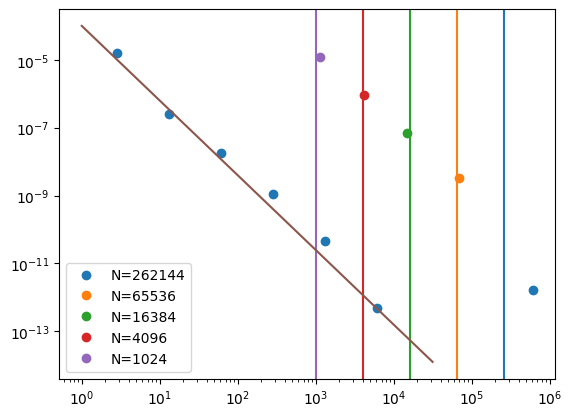

In [117]:
p = 0.01
#
for side, bins in zip(reversed([32, 64, 128, 256, 512, 724]), reversed([5, 10, 10, 10, 10, 10, 10])):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={1000}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    print(np.max(sizes), side**2)

    # Replicate sizes based on normalized probabilities for log binning
    # Using np.repeat and multiplying probabilities by a large number to simulate replication
    replicated_sizes = np.repeat(np.array(sizes), counts) 

    # Perform log binning on the replicated distribution
    bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=bins)

    total_area = np.sum(hist * bin_w)

    # Normalize the histogram to make it a probability distribution
    normalized_hist = hist / total_area

    # Plot the normalized probability distribution
    line, = plt.plot(bin_centers, normalized_hist / bin_w, marker='o', linestyle='', linewidth=2, label=f'N={side**2}')
    plt.axvline(side**2, c=line.get_color())

#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
x = np.logspace(0, 4.5)
plt.plot(x, 1e-4*x**(-2.2))
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [124]:
l = Lattice2D(2048, pflip=0.01)

In [ ]:
l.flip_random_fract_edges()

In [119]:
l.compute_k_eigvV()

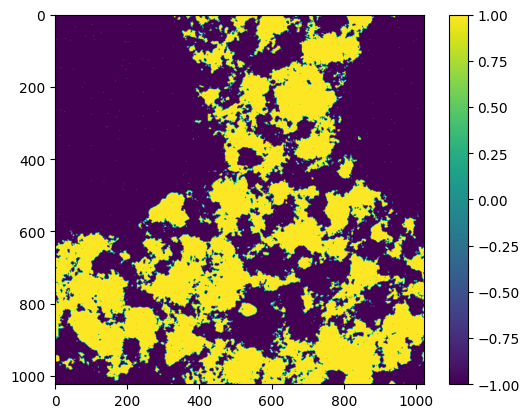

In [123]:
plt.imshow(l.bin_eigV().reshape(l.syshape))
plt.colorbar()

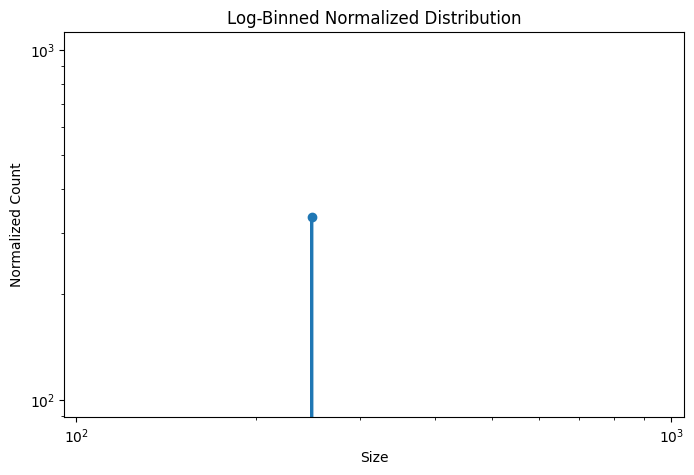

In [45]:


# Normalize counts to probabilities
total_counts = np.sum(counts)
probabilities = counts / total_counts

# Replicate sizes based on normalized probabilities for log binning
# Using np.repeat and multiplying probabilities by a large number to simulate replication
replicated_sizes = np.repeat(np.array(sizes), (probabilities * 10000).astype('int64')) 

# Perform log binning on the replicated distribution
bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=20)

# Plot the log-binned data using plt.plot
plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2)  # Normalizing y-values by bin width
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Size')
plt.ylabel('Normalized Count')
plt.title('Log-Binned Normalized Distribution')
plt.show()


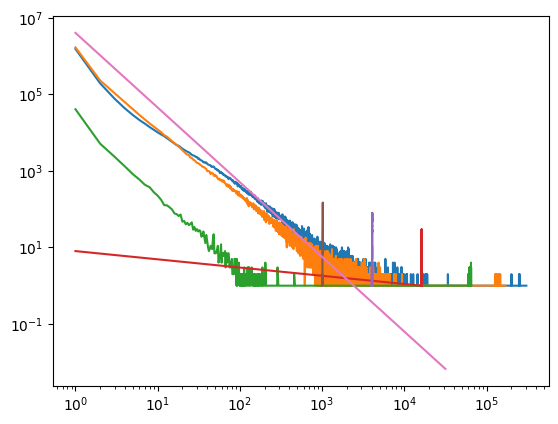

In [30]:
p = 0.034
#
for side in reversed([32, 64, 128, 256, 512, 724]):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={1000}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    plt.plot(sizes, counts)
#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
x = np.logspace(0, 4.5)
plt.plot(x, 4e6*x**(-1.95))
plt.xscale('log')
plt.yscale('log')